In [1269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [1270]:
train = pd.read_csv("train_split.csv",  parse_dates=["DATEPRD"], index_col="DATEPRD")

In [1271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1908 entries, 2010-01-01 to 2015-03-23
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ON_STREAM_HRS             1828 non-null   float64
 1   AVG_DOWNHOLE_PRESSURE     1828 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  1828 non-null   float64
 3   AVG_DP_TUBING             1828 non-null   float64
 4   AVG_ANNULUS_PRESS         1764 non-null   float64
 5   AVG_CHOKE_SIZE_P          1802 non-null   float64
 6   AVG_WHP_P                 1828 non-null   float64
 7   AVG_WHT_P                 1828 non-null   float64
 8   DP_CHOKE_SIZE             1828 non-null   float64
 9   BORE_OIL_VOL              1828 non-null   float64
 10  BORE_GAS_VOL              1828 non-null   float64
 11  BORE_WAT_VOL              1828 non-null   float64
 12  F_4_ON_STREAM_HRS         1908 non-null   float64
 13  F_4_BORE_WI_VOL           1862 non-null   flo

In [1272]:
# remove average annulur pressure and pressure drop across the choke as it has no influence on oil prodcution in reality
train.drop(["AVG_ANNULUS_PRESS"], axis=1, inplace=True)

In [1273]:
train.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,1828.000000,1828.000000,1828.000000,1828.000000,1802.000000,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03,1828.000000,1908.000000,1862.000000,1908.000000,1855.000000
mean,21.841193,3583.535031,214.625146,3019.578691,75.926647,572.536377,183.015493,152.270115,7261.418839,6.145965e+06,18826.746730,20.318801,31966.662247,20.354637,32030.073489
std,6.049317,373.637560,16.012126,354.479368,27.848957,219.312316,29.148980,239.001866,5028.465623,4.125306e+06,6465.248079,7.832144,13563.536469,7.831526,13098.199268
min,0.000000,0.000000,32.000000,39.914966,0.000000,4.962176,33.784862,0.914898,0.000000,0.000000e+00,-372.293889,0.000000,0.000000,0.000000,0.000000
25%,24.000000,3507.717504,212.045240,2869.027307,58.209641,466.837358,186.971179,42.193006,2982.109277,2.482519e+06,16688.534322,23.660412,27193.841709,23.976393,27747.420619
50%,24.000000,3573.179417,214.761736,2985.324683,87.925927,502.575163,189.891963,76.842538,6274.400564,5.642409e+06,20839.337582,24.000000,34665.079944,24.000000,34828.075900
75%,24.000000,3730.074164,219.996743,3208.012793,100.000000,608.024884,192.529627,164.022008,11186.679745,9.664422e+06,22753.562815,24.000000,40332.545356,24.000000,39781.794083
max,25.000000,4395.827404,224.190920,4381.731622,100.000000,1823.393702,200.317251,1823.393702,20005.937677,1.602415e+07,35800.155279,25.000000,56823.379072,25.000000,60050.679482


* errors with max values of ON_STREAM_HRS

In [1274]:
train.loc[train["ON_STREAM_HRS"] > 24]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-10-31,25.00000,3520.767327,223.046429,2871.425040,64.179190,649.342287,195.676613,180.062820,15706.097355,1.307633e+07,22364.553754,0.00000,NaN,25.00000,45412.432532
2013-10-27,24.30833,3629.031204,212.488638,3163.839511,95.810951,465.191693,188.802064,40.613515,4245.747951,3.561954e+06,22596.521969,24.14167,30282.481828,24.14167,31521.385822
2014-10-26,25.00000,3794.227178,211.361840,3344.602306,100.000000,449.624872,186.163029,33.225622,2169.795963,1.879031e+06,21262.264447,25.00000,45644.852304,25.00000,34259.333372


* check the neighouring values of this error and compare the coressponding oil rates 

In [1275]:
train.loc["2010-10-28":"2010-11-01",]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-10-28,24.0,3526.346223,223.109404,2872.806517,63.966683,653.539706,194.729701,183.860137,15200.459481,1.286277e+07,21410.829773,24.00000,39861.306133,24.0,41059.096029
2010-10-29,24.0,3527.515807,223.095913,2876.665436,64.318146,650.850371,192.715251,181.342427,15162.594821,1.288628e+07,21445.297935,24.00000,39806.545641,24.0,41229.846015
2010-10-30,24.0,3528.491678,223.082362,2877.550502,64.302068,650.941177,192.493694,181.237260,15139.259624,1.275813e+07,21549.897485,15.49166,25555.500468,24.0,42314.092907
2010-10-31,25.0,3520.767327,223.046429,2871.425040,64.179190,649.342287,195.676613,180.062820,15706.097355,1.307633e+07,22364.553754,0.00000,NaN,25.0,45412.432532
2010-11-01,24.0,3508.088863,223.001361,2863.978054,64.280773,644.110809,196.213734,175.478558,14949.747630,1.245995e+07,21241.067785,0.00000,NaN,24.0,43133.722720


In [1276]:
train.loc["2013-10-26":"2013-10-28",]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2013-10-26,24.00000,3621.774234,212.502632,3155.182102,100.000000,466.592132,190.098532,39.916470,4314.306887,3.604862e+06,22618.725001,24.00000,36582.796412,24.00000,39793.115742
2013-10-27,24.30833,3629.031204,212.488638,3163.839511,95.810951,465.191693,188.802064,40.613515,4245.747951,3.561954e+06,22596.521969,24.14167,30282.481828,24.14167,31521.385822
2013-10-28,0.00000,4313.021154,210.986492,4278.386867,1.136796,34.634287,77.197730,1.545812,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000


In [1277]:
train.loc["2014-10-25":"2014-10-29",]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2014-10-25,24.0,3793.774712,211.369640,3344.110574,100.0,449.664137,187.694010,33.349512,2068.718706,1.800371e+06,21127.662500,24.0,45231.567466,24.0,34303.204471
2014-10-26,25.0,3794.227178,211.361840,3344.602306,100.0,449.624872,186.163029,33.225622,2169.795963,1.879031e+06,21262.264447,25.0,45644.852304,25.0,34259.333372
2014-10-27,24.0,3798.927839,211.342938,3345.330466,100.0,453.597373,188.852440,33.431480,2073.813453,1.799962e+06,21060.676017,24.0,46681.303736,24.0,32956.245796
2014-10-28,24.0,3805.920812,211.332527,3347.036762,100.0,458.884050,189.014214,32.534566,2071.045936,1.793207e+06,20771.281831,24.0,47632.735674,24.0,31247.779061
2014-10-29,24.0,3801.023701,211.337267,3354.394886,100.0,446.628815,191.445502,33.422363,2000.159771,1.724181e+06,20441.821552,24.0,42108.057750,24.0,31477.222779


* based on the neibouring oil rates, these errors were producing for 24 hrs

In [1278]:
# fix the errors (24.31, 25) to 24 hrs
train["ON_STREAM_HRS"]  = np.where(train["ON_STREAM_HRS"] > 24 , 24, train["ON_STREAM_HRS"])

## missing values pattern when on stream hours = 0


* check the patterns of the misssing values when production is off

In [1279]:
train.loc[train["ON_STREAM_HRS"] == 0].describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,86.0,86.000000,86.000000,86.000000,60.000000,86.000000,86.000000,86.000000,86.0,86.000000,86.000000,86.000000,63.000000,86.000000,64.000000
mean,0.0,4222.939451,207.910477,3383.163776,1.148685,840.703929,58.235734,773.195166,0.0,23.151638,3.299956,1.103973,1495.617064,1.159787,1773.483744
std,0.0,539.163173,22.373520,881.401730,0.631069,783.521756,9.925354,748.333729,0.0,214.699463,30.602537,4.711572,5855.608395,4.726747,6291.553536
min,0.0,0.000000,32.000000,39.914966,0.000000,4.962176,33.784862,0.914898,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,4256.367455,210.091874,2653.516180,1.014951,41.256891,52.832574,36.027664,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,4294.139271,210.761168,3039.894812,1.144886,893.615092,56.747363,558.078456,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,4359.431199,212.012398,4223.690743,1.219942,1607.670116,60.150524,1543.075603,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,4395.827404,218.937457,4381.731622,5.294674,1823.393702,109.717783,1823.393702,0.0,1991.040910,283.796254,24.000000,27558.395811,24.000000,28568.816272


* AVG_DOWNHOLE_PRESSURE

In [1280]:
train.loc[(train.ON_STREAM_HRS == 0) &  (train.AVG_DOWNHOLE_PRESSURE == 0)] 

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2012-09-03,0.0,0.0,32.0,39.914966,0.840965,39.914966,58.402166,34.680264,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1281]:
# the data below between 2012-09-02 and 2012-09-28 are corrupted as there is no reason for which some variables change after the production ceased in a specfic period 
# the null values should be filled with forward filling strategy
train.loc["2012-08-25":"2012-10-02"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2012-08-25,0.00000,4262.402258,210.109946,4221.150334,1.142513,41.251924,59.984150,36.410999,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-26,0.00000,4262.086076,210.032888,4221.069403,1.065929,41.016672,58.903088,36.111641,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-27,0.00000,4261.766848,209.963390,4221.568768,0.915032,40.198079,56.698160,35.563834,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-28,0.00000,4261.464009,209.894900,4220.556115,0.927930,40.907894,59.122580,35.755718,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-29,0.00000,4261.209178,209.831648,4220.188154,1.091004,41.021023,59.661320,35.855649,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-30,0.00000,4264.088032,209.787656,4224.271547,1.134069,39.816485,55.724846,34.401211,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-31,0.00000,4277.293718,209.768450,4237.879422,1.150485,39.414295,54.447026,34.092281,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-09-01,0.00000,4291.010082,209.725844,4251.439145,0.986915,39.570936,56.084288,34.319990,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-09-02,0.00000,1791.440148,106.108628,1751.971898,0.816296,39.468249,58.056890,34.087349,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000


In [1282]:
train.loc["2012-09-02":"2012-09-06"] = np.nan
train.loc["2012-09-08":"2012-09-10"] = np.nan
train.loc["2012-09-12":"2012-09-14"] = np.nan
train.loc["2012-08-30":"2012-09-28"] = train.loc["2012-08-30":"2012-09-28"].ffill(axis =0)

* AVG_CHOKE_SIZE_P

In [1283]:
train.loc[train["ON_STREAM_HRS"] == 0].describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,100.0,100.000000,100.000000,100.000000,74.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,77.000000,100.000000,78.000000
mean,0.0,4308.233487,210.945919,3498.412211,1.076869,809.821275,57.691367,737.760637,0.0,19.910409,2.837963,0.949417,1223.686689,0.997417,1459.746419
std,0.0,70.437641,1.912375,792.490859,0.621503,783.337635,9.303281,739.240065,0.0,199.104091,28.379625,4.382681,5320.624733,4.398434,5730.966161
min,0.0,3927.602959,206.006702,2506.035861,0.000000,4.962176,33.784862,0.914898,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,4262.492870,209.725844,2693.040160,0.986915,40.989478,52.870820,35.707747,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,4314.178265,210.393716,3802.020859,1.134854,494.347641,56.072831,281.375923,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,4374.658023,211.474175,4253.593790,1.217009,1606.587241,60.001835,1510.622829,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,4395.827404,218.937457,4381.731622,5.294674,1823.393702,109.717783,1823.393702,0.0,1991.040910,283.796254,24.000000,27558.395811,24.000000,28568.816272


In [1284]:
train.loc[(train.ON_STREAM_HRS == 0) &  (train.AVG_CHOKE_SIZE_P < 10)]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-04-01,0.0,3927.602959,218.937457,3122.300452,5.294674,805.302507,109.717783,278.732567,0.0,0.0,0.0,12.00001,15655.338583,12.00001,9717.757377
2011-10-19,0.0,4233.414726,211.470170,2644.373001,1.173912,1589.041725,46.995332,1589.041725,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000
2011-10-20,0.0,4263.034332,211.368920,2569.533383,1.195408,1693.500949,45.268970,1693.500949,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000
2011-10-21,0.0,4351.337223,211.459982,2568.797026,0.986629,1782.540197,50.396252,1782.540197,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000
2011-10-22,0.0,4360.584539,211.332308,2564.652283,0.992474,1795.932256,53.004740,1795.932256,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-20,0.0,4381.566569,209.783804,4376.604393,1.231110,4.962176,57.901712,3.597226,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000
2014-08-21,0.0,4386.874080,210.091874,4381.731622,1.283360,5.142458,67.619282,0.914898,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000
2014-08-22,0.0,4386.874080,210.091874,4381.731622,1.283360,5.142458,67.619282,0.914898,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000


In [1285]:
train.loc[(train.ON_STREAM_HRS == 0) &  (train.AVG_CHOKE_SIZE_P < 10), "AVG_CHOKE_SIZE_P"] = 0

In [1286]:
train.loc["2010-04-01"]

ON_STREAM_HRS                   0.000000
AVG_DOWNHOLE_PRESSURE        3927.602959
AVG_DOWNHOLE_TEMPERATURE      218.937457
AVG_DP_TUBING                3122.300452
AVG_CHOKE_SIZE_P                0.000000
AVG_WHP_P                     805.302507
AVG_WHT_P                     109.717783
DP_CHOKE_SIZE                 278.732567
BORE_OIL_VOL                    0.000000
BORE_GAS_VOL                    0.000000
BORE_WAT_VOL                    0.000000
F_4_ON_STREAM_HRS              12.000010
F_4_BORE_WI_VOL             15655.338583
F_5_ON_STREAM_HRS              12.000010
F_5_BORE_WI_VOL              9717.757377
Name: 2010-04-01 00:00:00, dtype: float64

In [1287]:
# impute the missing values , at ON_STREAM_HRS = 0, of AVG_CHOKE_SIZE_P with the mean 
train.loc[(train.ON_STREAM_HRS == 0) & (train.AVG_CHOKE_SIZE_P.isna()),"AVG_CHOKE_SIZE_P" ]  = train.loc[train["ON_STREAM_HRS"] == 0].AVG_CHOKE_SIZE_P.mean()

* BORE_GAS_VOL	& BORE_WAT_VOL

In [1288]:
train.loc[train["ON_STREAM_HRS"] == 0].describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,100.0,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,77.000000,100.000000,78.000000
mean,0.0,4308.233487,210.945919,3498.412211,0.0,809.821275,57.691367,737.760637,0.0,19.910409,2.837963,0.949417,1223.686689,0.997417,1459.746419
std,0.0,70.437641,1.912375,792.490859,0.0,783.337635,9.303281,739.240065,0.0,199.104091,28.379625,4.382681,5320.624733,4.398434,5730.966161
min,0.0,3927.602959,206.006702,2506.035861,0.0,4.962176,33.784862,0.914898,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,4262.492870,209.725844,2693.040160,0.0,40.989478,52.870820,35.707747,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,4314.178265,210.393716,3802.020859,0.0,494.347641,56.072831,281.375923,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,4374.658023,211.474175,4253.593790,0.0,1606.587241,60.001835,1510.622829,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,4395.827404,218.937457,4381.731622,0.0,1823.393702,109.717783,1823.393702,0.0,1991.040910,283.796254,24.000000,27558.395811,24.000000,28568.816272


In [1289]:
train.loc[(train.ON_STREAM_HRS == 0) & (train.BORE_GAS_VOL > 0 ), "BORE_GAS_VOL"] = 0 
train.loc[(train.ON_STREAM_HRS == 0) & (train.BORE_WAT_VOL > 0 ), "BORE_WAT_VOL"] = 0 

In [1290]:
train.loc[train["ON_STREAM_HRS"] == 0].describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,100.0,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.000000,77.000000,100.000000,78.000000
mean,0.0,4308.233487,210.945919,3498.412211,0.0,809.821275,57.691367,737.760637,0.0,0.0,0.0,0.949417,1223.686689,0.997417,1459.746419
std,0.0,70.437641,1.912375,792.490859,0.0,783.337635,9.303281,739.240065,0.0,0.0,0.0,4.382681,5320.624733,4.398434,5730.966161
min,0.0,3927.602959,206.006702,2506.035861,0.0,4.962176,33.784862,0.914898,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,4262.492870,209.725844,2693.040160,0.0,40.989478,52.870820,35.707747,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,4314.178265,210.393716,3802.020859,0.0,494.347641,56.072831,281.375923,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.0,4374.658023,211.474175,4253.593790,0.0,1606.587241,60.001835,1510.622829,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,0.0,4395.827404,218.937457,4381.731622,0.0,1823.393702,109.717783,1823.393702,0.0,0.0,0.0,24.000000,27558.395811,24.000000,28568.816272


## missing values pattern when on stream hours > 0

In [1291]:
train.loc[train["ON_STREAM_HRS"] > 0].describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1.742000e+03,1742.000000,1742.000000,1737.000000,1742.000000,1729.000000
mean,22.918136,3551.968567,214.956640,3001.629026,78.502237,559.297335,189.175688,121.615950,7619.904499,6.449382e+06,19756.032851,22.177994,34196.006551,22.198875,34271.869787
std,3.697336,333.340941,15.565235,295.095859,24.554708,129.513062,8.930015,112.328420,4878.657054,3.987584e+06,5049.521312,5.112646,11036.135873,5.142256,10409.307724
min,0.625000,0.000000,32.000000,104.707961,1.304608,414.514894,53.842397,26.986429,0.000000,0.000000e+00,-372.293889,0.000000,0.000000,0.000000,0.000000
25%,24.000000,3505.958853,212.106948,2872.821745,59.338504,467.180160,187.427961,42.528627,3478.689824,2.853691e+06,17067.605482,24.000000,28852.299851,24.000000,29014.106476
50%,24.000000,3563.843421,215.198131,2985.324683,95.924296,502.311176,190.162747,75.726114,6550.240208,5.834831e+06,21006.992483,24.000000,35554.439853,24.000000,35502.066347
75%,24.000000,3697.907735,220.332333,3198.263924,100.000000,601.278632,192.641332,159.418120,11361.615102,9.853054e+06,22802.261674,24.000000,40644.040608,24.000000,40141.617605
max,24.000000,4242.923276,224.190920,3432.471293,100.000000,1472.326823,200.317251,1110.605408,20005.937677,1.602415e+07,35800.155279,25.000000,56823.379072,25.000000,60050.679482


* ON_STREAM_HRS

In [1292]:
train.loc[(train["ON_STREAM_HRS"] < 5) & (train["ON_STREAM_HRS"] > 0)]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-03-02,1.52500,4056.406377,217.045948,2584.079554,7.913890,1472.326823,53.842397,1110.605408,324.617125,1.301300e+05,195.235721,0.00000,NaN,0.00000,NaN
2010-09-14,4.75833,4140.175978,222.769781,2924.567784,16.267234,1215.608194,182.678748,762.403034,892.146736,7.816608e+05,1244.124537,24.00000,26934.455835,24.00000,25510.780101
2010-11-15,3.32500,3544.258430,222.801656,2873.999121,68.520934,670.259310,196.180465,188.820733,1882.540313,1.591700e+06,3437.192799,14.25000,15265.370326,14.25000,15120.704682
2011-07-09,1.57500,4107.239553,215.640599,3072.494546,10.228295,1034.745006,88.634206,588.271092,122.525510,2.334540e+05,1029.327505,1.15833,1301.990794,1.15833,1195.064014
2011-07-15,2.99166,3956.316807,217.010336,2928.712393,20.342270,1027.604414,126.493370,595.570934,888.498645,4.734182e+05,1118.076732,1.82500,1484.395302,1.82500,3163.774732
2011-07-30,2.34167,3623.153116,218.279284,2891.679323,46.967670,731.473794,190.347537,299.517797,1673.907295,1.094579e+06,2368.553978,2.00834,2698.328747,1.84167,3195.223785
2011-12-06,4.80833,3555.413107,217.107458,2942.748927,15.159327,612.664180,186.312893,181.006326,3574.688058,2.564708e+06,7706.464641,4.64167,6725.065494,4.64167,7438.958997
2011-12-13,4.30833,3535.523948,217.067847,2928.692696,14.023717,606.831251,184.451864,170.638752,3593.997777,2.637858e+06,7681.305399,4.30833,6610.590941,4.30833,7220.702569
2011-12-29,2.85833,3848.105625,216.128178,3034.741521,4.824328,813.364103,142.570095,351.724686,1000.520172,8.498937e+05,3453.923695,2.52500,2900.231668,2.52500,2736.067611


In [1293]:
# check why the oil prodcution is zero
train.loc["2012-08-10":"2012-09-25"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2012-08-10,24.00000,3341.754451,215.418140,2872.915071,100.000000,468.839380,188.058434,44.978000,6557.064652,5.777168e+06,17650.466506,24.00000,26615.333554,24.00000,26988.319322
2012-08-11,24.00000,3340.121417,215.411423,2872.940580,100.000000,467.180837,188.020174,45.084697,6587.318641,5.877184e+06,17637.509496,24.00000,35963.879049,24.00000,42971.357038
2012-08-12,24.00000,3347.914129,215.409665,2878.807199,99.998988,469.106929,186.100771,44.361759,6556.246977,5.817801e+06,17865.326436,24.00000,30501.807524,24.00000,33438.520093
2012-08-13,0.62500,3667.893411,215.395826,2998.507324,7.777673,669.386087,182.686410,249.518573,1273.875341,1.325755e+05,-372.293889,4.45833,4917.373927,21.12499,26662.507133
2012-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.00000,0.000000
2012-08-15,0.00000,4266.516108,211.477820,4211.907660,0.000000,54.608449,60.681056,45.099340,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-16,0.00000,4266.122331,211.191710,4217.272896,0.000000,48.849435,60.916640,46.136795,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-17,0.00000,4265.677210,211.004366,4220.144788,0.000000,45.532422,60.144584,42.553782,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.00000,0.000000


In [1294]:
# check wy the oil prodcution is zero
train.loc["2012-09-15"].ON_STREAM_HRS = 0

In [1295]:
train.loc["2012-08-10":"2012-09-25"] = train.loc["2012-08-10":"2012-09-25"].bfill(axis=0)

In [1296]:
# check wy the oil prodcution is zero
train.loc["2012-08-10":"2012-09-25"]


,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2012-08-10,24.000,3341.754451,215.418140,2872.915071,100.000000,468.839380,188.058434,44.978000,6557.064652,5.777168e+06,17650.466506,24.00000,26615.333554,24.00000,26988.319322
2012-08-11,24.000,3340.121417,215.411423,2872.940580,100.000000,467.180837,188.020174,45.084697,6587.318641,5.877184e+06,17637.509496,24.00000,35963.879049,24.00000,42971.357038
2012-08-12,24.000,3347.914129,215.409665,2878.807199,99.998988,469.106929,186.100771,44.361759,6556.246977,5.817801e+06,17865.326436,24.00000,30501.807524,24.00000,33438.520093
2012-08-13,0.625,3667.893411,215.395826,2998.507324,7.777673,669.386087,182.686410,249.518573,1273.875341,1.325755e+05,-372.293889,4.45833,4917.373927,21.12499,26662.507133
2012-08-14,0.000,4266.516108,211.477820,4211.907660,0.000000,54.608449,60.681056,45.099340,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-15,0.000,4266.516108,211.477820,4211.907660,0.000000,54.608449,60.681056,45.099340,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-16,0.000,4266.122331,211.191710,4217.272896,0.000000,48.849435,60.916640,46.136795,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-17,0.000,4265.677210,211.004366,4220.144788,0.000000,45.532422,60.144584,42.553782,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000
2012-08-18,0.000,4264.789289,210.737048,4221.712211,0.000000,43.077078,61.091096,39.592547,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.00000,0.000000


In [1297]:
# replace the negative value in the water volume column with  positive one
train.loc["2012-08-13"].BORE_WAT_VOL = train.loc["2012-08-13"].BORE_WAT_VOL *-1

In [1298]:
train.loc[(train["ON_STREAM_HRS"] < 5) & (train["ON_STREAM_HRS"] > 0)]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-03-02,1.52500,4056.406377,217.045948,2584.079554,7.913890,1472.326823,53.842397,1110.605408,324.617125,1.301300e+05,195.235721,0.00000,NaN,0.00000,NaN
2010-09-14,4.75833,4140.175978,222.769781,2924.567784,16.267234,1215.608194,182.678748,762.403034,892.146736,7.816608e+05,1244.124537,24.00000,26934.455835,24.00000,25510.780101
2010-11-15,3.32500,3544.258430,222.801656,2873.999121,68.520934,670.259310,196.180465,188.820733,1882.540313,1.591700e+06,3437.192799,14.25000,15265.370326,14.25000,15120.704682
2011-07-09,1.57500,4107.239553,215.640599,3072.494546,10.228295,1034.745006,88.634206,588.271092,122.525510,2.334540e+05,1029.327505,1.15833,1301.990794,1.15833,1195.064014
2011-07-15,2.99166,3956.316807,217.010336,2928.712393,20.342270,1027.604414,126.493370,595.570934,888.498645,4.734182e+05,1118.076732,1.82500,1484.395302,1.82500,3163.774732
2011-07-30,2.34167,3623.153116,218.279284,2891.679323,46.967670,731.473794,190.347537,299.517797,1673.907295,1.094579e+06,2368.553978,2.00834,2698.328747,1.84167,3195.223785
2011-12-06,4.80833,3555.413107,217.107458,2942.748927,15.159327,612.664180,186.312893,181.006326,3574.688058,2.564708e+06,7706.464641,4.64167,6725.065494,4.64167,7438.958997
2011-12-13,4.30833,3535.523948,217.067847,2928.692696,14.023717,606.831251,184.451864,170.638752,3593.997777,2.637858e+06,7681.305399,4.30833,6610.590941,4.30833,7220.702569
2011-12-29,2.85833,3848.105625,216.128178,3034.741521,4.824328,813.364103,142.570095,351.724686,1000.520172,8.498937e+05,3453.923695,2.52500,2900.231668,2.52500,2736.067611


* AVG_DOWNHOLE_PRESSUR

In [1299]:
train.loc[train["ON_STREAM_HRS"] > 0].describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1.741000e+03,1741.000000,1741.000000,1736.000000,1741.000000,1728.000000
mean,22.930750,3551.571695,214.959003,3001.723029,78.546578,558.811605,189.251763,121.067688,7624.281239,6.453086e+06,19767.808049,22.190732,34215.704712,22.211625,34291.703045
std,3.660716,333.024784,15.569395,295.154554,24.491902,127.953273,8.348865,110.004519,4876.636636,3.985730e+06,5027.023134,5.086386,11008.729250,5.116114,10379.591431
min,0.625000,0.000000,32.000000,104.707961,2.485842,414.514894,53.842397,26.986429,27.046186,3.023006e+04,195.235721,0.000000,0.000000,0.000000,0.000000
25%,24.000000,3505.917280,212.107118,2872.867429,59.358247,467.179934,187.433905,42.524312,3488.643449,2.854252e+06,17075.577817,24.000000,28854.426294,24.000000,29019.386792
50%,24.000000,3563.802481,215.201908,2985.330417,96.037641,502.299302,190.167742,75.707545,6552.535989,5.835679e+06,21011.489698,24.000000,35562.230090,24.000000,35506.105672
75%,24.000000,3697.586548,220.335749,3198.274370,100.000000,601.060085,192.641538,159.410231,11364.052403,9.853613e+06,22803.268044,24.000000,40648.072464,24.000000,40148.925003
max,24.000000,4174.252236,224.190920,3432.471293,100.000000,1472.326823,200.317251,1110.605408,20005.937677,1.602415e+07,35800.155279,25.000000,56823.379072,25.000000,60050.679482


In [1300]:
# insect the low vallues of average downhole pressure
train.loc[(train["ON_STREAM_HRS"] > 0) & (train["AVG_DOWNHOLE_PRESSURE"] < 20)]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-02-15,13.7,0.0,32.0,1004.517786,28.839026,1004.517786,165.803947,553.356496,6329.247712,4.856041e+06,4231.029794,11.07500,19743.715473,10.32500,17296.979150
2010-02-16,24.0,0.0,32.0,866.871657,41.811064,866.871657,187.460535,397.480589,16680.955100,1.314600e+07,14895.718157,24.00000,49794.803365,24.00000,52400.748596
2010-02-17,24.0,0.0,32.0,867.512968,41.785463,867.512968,185.725022,398.272015,16393.762348,1.292608e+07,14438.826315,24.00000,48775.257270,24.00000,53774.451831
2010-02-18,21.6,0.0,32.0,896.305278,39.018513,896.305278,184.233170,424.086643,13470.824464,1.062037e+07,12444.704763,19.83334,44893.513749,19.83334,50718.863507
2010-02-19,24.0,0.0,32.0,877.896190,41.378970,877.896190,192.113731,408.609501,16107.701762,1.270653e+07,15385.191218,24.00000,45695.945729,24.00000,53422.621790
2010-02-20,24.0,0.0,32.0,885.262284,40.981887,885.262284,193.308051,416.372261,15845.982743,1.249969e+07,15532.498582,24.00000,46320.728076,24.00000,54312.853228
2010-02-21,24.0,0.0,32.0,887.570896,40.096205,887.570896,193.521431,418.251596,15678.296392,1.236147e+07,15519.478674,24.00000,44189.434548,24.00000,57414.512629
2010-02-22,24.0,0.0,32.0,894.000123,40.834275,894.000123,193.767757,424.722487,15630.368035,1.236109e+07,15589.484266,24.00000,43088.377460,24.00000,60050.679482
2013-09-28,24.0,0.0,32.0,467.593838,99.227820,467.593838,190.041130,44.005459,5026.816632,4.284150e+06,25382.027491,24.00000,30681.895778,24.00000,33266.501816


In [1301]:
#avergae downhole pressure and tempwerature are corrupted
train.loc["2010-02-07":"2010-02-27"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-02-07,24.00000,3594.214970,223.279101,2729.827109,41.979399,864.387861,193.466895,395.527596,16020.210496,1.275398e+07,16164.624548,24.00000,49596.404828,24.00000,47953.774186
2010-02-08,24.00000,3578.127596,223.310928,2732.519142,43.334740,845.608454,193.952946,375.230383,16407.033848,1.296437e+07,17298.866093,24.00000,49526.720631,24.00000,48145.111268
2010-02-09,24.00000,3588.018728,223.323423,2735.243057,42.843234,852.775672,193.950139,383.180464,16222.365009,1.281081e+07,17137.280859,24.00000,46859.088970,24.00000,50437.991201
2010-02-10,24.00000,2735.842924,177.108733,1865.082428,41.727705,870.760496,193.357691,402.951703,15861.204084,1.255093e+07,16454.270326,24.00000,45801.378467,24.00000,51193.225314
2010-02-11,24.00000,3628.682766,223.296603,2740.441025,40.501278,888.241741,193.680124,420.714650,15729.621247,1.239212e+07,14343.095398,24.00000,46015.623461,24.00000,51129.747909
2010-02-12,24.00000,3665.907003,223.278729,2745.819885,38.670408,920.087118,193.413885,456.185115,14899.240451,1.168902e+07,14136.978305,24.00000,44006.365367,24.00000,47281.678474
2010-02-13,24.00000,3661.378318,223.188413,2736.465891,38.785386,924.912427,193.216220,460.194944,15262.477013,1.178482e+07,14843.072443,24.00000,29389.907011,24.00000,19147.351579
2010-02-14,15.33334,3223.758742,201.480217,2332.853883,34.260503,890.904859,182.553686,462.462454,9037.828851,7.112770e+06,8102.345321,13.59167,26260.802024,13.59167,21412.331020
2010-02-15,13.70000,0.000000,32.000000,1004.517786,28.839026,1004.517786,165.803947,553.356496,6329.247712,4.856041e+06,4231.029794,11.07500,19743.715473,10.32500,17296.979150


In [1302]:
train["2010-02-10":"2010-02-27"]["AVG_DOWNHOLE_PRESSURE"] 

DATEPRD
2010-02-10    2735.842924
2010-02-11    3628.682766
2010-02-12    3665.907003
2010-02-13    3661.378318
2010-02-14    3223.758742
2010-02-15       0.000000
2010-02-16       0.000000
2010-02-17       0.000000
2010-02-18       0.000000
2010-02-19       0.000000
2010-02-20       0.000000
2010-02-21       0.000000
2010-02-22       0.000000
2010-02-23    1032.010168
2010-02-24    3637.945870
2010-02-25     717.217989
2010-02-26    3703.984804
2010-02-27    3644.620642
Name: AVG_DOWNHOLE_PRESSURE, dtype: float64

In [1303]:
#  replace the corrupted values with NaN then impute the downhole pressure with linear interpolation and temperature with 
train.loc["2010-02-10":"2010-02-27","AVG_DOWNHOLE_PRESSURE"] =  train.loc["2010-02-10":"2010-02-27","AVG_DOWNHOLE_PRESSURE"].apply(lambda x: np.nan if x < 3300 else x)
train.loc["2010-02-09":"2010-02-27","AVG_DOWNHOLE_PRESSURE"] = train.loc["2010-02-09":"2010-02-27","AVG_DOWNHOLE_PRESSURE"].interpolate(
    method ='linear', limit_direction ='forward')
# downhole temperature
train.loc["2010-02-10":"2010-02-27","AVG_DOWNHOLE_TEMPERATURE"] = train["2010-02-10":"2010-02-27"]["AVG_DOWNHOLE_TEMPERATURE"].apply(lambda x:np.nan if x < 220  else x) 
train.loc["2010-02-10":"2010-02-27","AVG_DOWNHOLE_TEMPERATURE"] = train["2010-02-10":"2010-02-27"]["AVG_DOWNHOLE_TEMPERATURE"].apply(
    lambda x:np.nan if x < 220  else x).replace(
        np.nan,train.loc["2010-02-10":"2010-02-27","AVG_DOWNHOLE_TEMPERATURE"].mean() )

In [1304]:
train["2010-02-07":"2010-02-27"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-02-07,24.00000,3594.214970,223.279101,2729.827109,41.979399,864.387861,193.466895,395.527596,16020.210496,1.275398e+07,16164.624548,24.00000,49596.404828,24.00000,47953.774186
2010-02-08,24.00000,3578.127596,223.310928,2732.519142,43.334740,845.608454,193.952946,375.230383,16407.033848,1.296437e+07,17298.866093,24.00000,49526.720631,24.00000,48145.111268
2010-02-09,24.00000,3588.018728,223.323423,2735.243057,42.843234,852.775672,193.950139,383.180464,16222.365009,1.281081e+07,17137.280859,24.00000,46859.088970,24.00000,50437.991201
2010-02-10,24.00000,3608.350747,223.296296,1865.082428,41.727705,870.760496,193.357691,402.951703,15861.204084,1.255093e+07,16454.270326,24.00000,45801.378467,24.00000,51193.225314
2010-02-11,24.00000,3628.682766,223.296603,2740.441025,40.501278,888.241741,193.680124,420.714650,15729.621247,1.239212e+07,14343.095398,24.00000,46015.623461,24.00000,51129.747909
2010-02-12,24.00000,3665.907003,223.278729,2745.819885,38.670408,920.087118,193.413885,456.185115,14899.240451,1.168902e+07,14136.978305,24.00000,44006.365367,24.00000,47281.678474
2010-02-13,24.00000,3661.378318,223.188413,2736.465891,38.785386,924.912427,193.216220,460.194944,15262.477013,1.178482e+07,14843.072443,24.00000,29389.907011,24.00000,19147.351579
2010-02-14,15.33334,3659.248095,223.296296,2332.853883,34.260503,890.904859,182.553686,462.462454,9037.828851,7.112770e+06,8102.345321,13.59167,26260.802024,13.59167,21412.331020
2010-02-15,13.70000,3657.117873,223.296296,1004.517786,28.839026,1004.517786,165.803947,553.356496,6329.247712,4.856041e+06,4231.029794,11.07500,19743.715473,10.32500,17296.979150


In [1305]:
# fix the pressure drop along the tubing
train.loc["2010-02-07":"2010-02-27", "AVG_DP_TUBING"]  = train["2010-02-07":"2010-02-27"].AVG_DOWNHOLE_PRESSURE - train["2010-02-07":"2010-02-27"].AVG_WHP_P

In [1306]:
train["2010-02-07":"2010-02-27"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-02-07,24.00000,3594.214970,223.279101,2729.827109,41.979399,864.387861,193.466895,395.527596,16020.210496,1.275398e+07,16164.624548,24.00000,49596.404828,24.00000,47953.774186
2010-02-08,24.00000,3578.127596,223.310928,2732.519142,43.334740,845.608454,193.952946,375.230383,16407.033848,1.296437e+07,17298.866093,24.00000,49526.720631,24.00000,48145.111268
2010-02-09,24.00000,3588.018728,223.323423,2735.243057,42.843234,852.775672,193.950139,383.180464,16222.365009,1.281081e+07,17137.280859,24.00000,46859.088970,24.00000,50437.991201
2010-02-10,24.00000,3608.350747,223.296296,2737.590251,41.727705,870.760496,193.357691,402.951703,15861.204084,1.255093e+07,16454.270326,24.00000,45801.378467,24.00000,51193.225314
2010-02-11,24.00000,3628.682766,223.296603,2740.441025,40.501278,888.241741,193.680124,420.714650,15729.621247,1.239212e+07,14343.095398,24.00000,46015.623461,24.00000,51129.747909
2010-02-12,24.00000,3665.907003,223.278729,2745.819885,38.670408,920.087118,193.413885,456.185115,14899.240451,1.168902e+07,14136.978305,24.00000,44006.365367,24.00000,47281.678474
2010-02-13,24.00000,3661.378318,223.188413,2736.465891,38.785386,924.912427,193.216220,460.194944,15262.477013,1.178482e+07,14843.072443,24.00000,29389.907011,24.00000,19147.351579
2010-02-14,15.33334,3659.248095,223.296296,2768.343236,34.260503,890.904859,182.553686,462.462454,9037.828851,7.112770e+06,8102.345321,13.59167,26260.802024,13.59167,21412.331020
2010-02-15,13.70000,3657.117873,223.296296,2652.600086,28.839026,1004.517786,165.803947,553.356496,6329.247712,4.856041e+06,4231.029794,11.07500,19743.715473,10.32500,17296.979150


In [1307]:
# fixing the zero downhole pressure
train["2013-09-23":"2013-10-03"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2013-09-23,24.00000,3597.688621,212.739127,3127.452410,100.000000,470.236211,191.650081,42.474425,3937.358537,3.283687e+06,21629.023303,24.00000,35689.300702,24.0,41347.147492
2013-09-24,24.00000,3592.840871,212.828124,3121.709725,100.000000,471.131146,191.546557,43.237590,4129.134863,3.457000e+06,23161.598553,24.00000,35013.099899,24.0,41681.787562
2013-09-25,24.00000,3591.773057,212.876109,3120.522250,100.000000,471.250808,191.900340,43.216025,4148.444581,3.479056e+06,23155.749030,24.00000,34616.457546,24.0,42094.936639
2013-09-26,24.00000,3593.849656,212.870566,3123.007692,100.000000,470.841964,192.082559,42.789759,4163.414330,3.490468e+06,23217.326275,24.00000,34533.756852,24.0,42357.215577
2013-09-27,16.83333,2711.346860,164.424061,2187.697997,52.943052,523.648863,186.530195,106.661602,3092.888566,2.780044e+06,17164.893127,13.33333,13973.820370,13.5,17044.838298
2013-09-28,24.00000,0.000000,32.000000,467.593838,99.227820,467.593838,190.041130,44.005459,5026.816632,4.284150e+06,25382.027491,24.00000,30681.895778,24.0,33266.501816
2013-09-29,24.00000,1967.086345,130.568882,1495.915398,100.000000,471.170946,188.718707,43.403900,4187.126916,3.524179e+06,23799.322450,24.00000,35538.679915,24.0,40906.329861
2013-09-30,24.00000,3596.345708,212.286011,3125.303241,100.000000,471.042467,186.792498,43.112930,4286.002739,3.599986e+06,23010.517303,24.00000,36360.877245,24.0,31427.785064
2013-10-01,24.00000,3605.302658,212.756734,3134.845023,100.000000,470.457636,186.766508,42.796445,4283.486815,3.592876e+06,27781.716032,24.00000,34628.132269,24.0,35430.972715


In [1308]:
#  replace the corrupted values with NaN then impute the downhole pressure with linear interpolation and temperature with 
train.loc["2013-09-23":"2013-10-03","AVG_DOWNHOLE_PRESSURE"] =  train.loc["2013-09-23":"2013-10-03","AVG_DOWNHOLE_PRESSURE"].apply(lambda x: np.nan if x < 3000 else x)
train.loc["2013-09-23":"2013-10-03","AVG_DOWNHOLE_PRESSURE"] = train.loc["2013-09-23":"2013-10-03","AVG_DOWNHOLE_PRESSURE"].interpolate(
    method ='linear', limit_direction ='forward')
# downhole temperature
train.loc["2013-09-23":"2013-10-03","AVG_DOWNHOLE_TEMPERATURE"] = train["2013-09-23":"2013-10-03"]["AVG_DOWNHOLE_TEMPERATURE"].apply(lambda x:np.nan if x < 200  else x) 
train.loc["2013-09-23":"2013-10-03","AVG_DOWNHOLE_TEMPERATURE"] = train["2013-09-23":"2013-10-03"]["AVG_DOWNHOLE_TEMPERATURE"].apply(
    lambda x:np.nan if x < 200  else x).replace(
        np.nan,train.loc["2013-09-23":"2013-10-03","AVG_DOWNHOLE_TEMPERATURE"].mean() )
# fix the pressure drop along the tubing
train.loc["2013-09-23":"2013-10-03", "AVG_DP_TUBING"]  = train["2013-09-23":"2013-10-03"].AVG_DOWNHOLE_PRESSURE - train["2013-09-23":"2013-10-03"].AVG_WHP_P

In [1309]:
train["2013-09-23":"2013-10-03"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2013-09-23,24.00000,3597.688621,212.739127,3127.452410,100.000000,470.236211,191.650081,42.474425,3937.358537,3.283687e+06,21629.023303,24.00000,35689.300702,24.0,41347.147492
2013-09-24,24.00000,3592.840871,212.828124,3121.709725,100.000000,471.131146,191.546557,43.237590,4129.134863,3.457000e+06,23161.598553,24.00000,35013.099899,24.0,41681.787562
2013-09-25,24.00000,3591.773057,212.876109,3120.522250,100.000000,471.250808,191.900340,43.216025,4148.444581,3.479056e+06,23155.749030,24.00000,34616.457546,24.0,42094.936639
2013-09-26,24.00000,3593.849656,212.870566,3123.007692,100.000000,470.841964,192.082559,42.789759,4163.414330,3.490468e+06,23217.326275,24.00000,34533.756852,24.0,42357.215577
2013-09-27,16.83333,3594.473669,212.733233,3070.824806,52.943052,523.648863,186.530195,106.661602,3092.888566,2.780044e+06,17164.893127,13.33333,13973.820370,13.5,17044.838298
2013-09-28,24.00000,3595.097682,212.733233,3127.503844,99.227820,467.593838,190.041130,44.005459,5026.816632,4.284150e+06,25382.027491,24.00000,30681.895778,24.0,33266.501816
2013-09-29,24.00000,3595.721695,212.733233,3124.550748,100.000000,471.170946,188.718707,43.403900,4187.126916,3.524179e+06,23799.322450,24.00000,35538.679915,24.0,40906.329861
2013-09-30,24.00000,3596.345708,212.286011,3125.303241,100.000000,471.042467,186.792498,43.112930,4286.002739,3.599986e+06,23010.517303,24.00000,36360.877245,24.0,31427.785064
2013-10-01,24.00000,3605.302658,212.756734,3134.845023,100.000000,470.457636,186.766508,42.796445,4283.486815,3.592876e+06,27781.716032,24.00000,34628.132269,24.0,35430.972715


In [1310]:
train.loc[train["ON_STREAM_HRS"] > 0].describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1.741000e+03,1741.000000,1741.000000,1736.000000,1741.000000,1728.000000
mean,22.930750,3575.795685,216.222822,3016.984080,78.546578,558.811605,189.251763,121.067688,7624.281239,6.453086e+06,19767.808049,22.190732,34215.704712,22.211625,34291.703045
std,3.660716,185.972998,6.325086,226.094439,24.491902,127.953273,8.348865,110.004519,4876.636636,3.985730e+06,5027.023134,5.086386,11008.729250,5.116114,10379.591431
min,0.625000,1401.190798,103.583883,907.610503,2.485842,414.514894,53.842397,26.986429,27.046186,3.023006e+04,195.235721,0.000000,0.000000,0.000000,0.000000
25%,24.000000,3507.043763,212.143201,2872.970228,59.358247,467.179934,187.433905,42.524312,3488.643449,2.854252e+06,17075.577817,24.000000,28854.426294,24.000000,29019.386792
50%,24.000000,3568.077499,215.431736,2986.440330,96.037641,502.299302,190.167742,75.707545,6552.535989,5.835679e+06,21011.489698,24.000000,35562.230090,24.000000,35506.105672
75%,24.000000,3697.586548,220.573271,3198.274370,100.000000,601.060085,192.641538,159.410231,11364.052403,9.853613e+06,22803.268044,24.000000,40648.072464,24.000000,40148.925003
max,24.000000,4174.252236,224.190920,3432.471293,100.000000,1472.326823,200.317251,1110.605408,20005.937677,1.602415e+07,35800.155279,25.000000,56823.379072,25.000000,60050.679482


In [1311]:
# downhole pressure that is 1401.190798
train.loc[(train["ON_STREAM_HRS"] > 0) &(train["AVG_DOWNHOLE_PRESSURE"] < 2000) ]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2013-05-15,24.0,1401.190798,103.583883,907.610503,100.0,493.580295,186.574943,70.697011,5311.870848,4.887868e+06,24386.413372,24.0,28454.286407,24.0,29703.428678


In [1312]:
train.loc["2013-05-10":"2013-05-19"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2013-05-10,24.00000,3546.590037,213.680828,3077.232522,100.000000,469.357515,189.749051,48.138787,5876.381349,5.400874e+06,22465.064928,24.00000,33781.943752,24.00000,35672.660818
2013-05-11,24.00000,3547.639872,213.673099,3078.769169,100.000000,468.870702,189.650165,47.722921,5879.777847,5.411927e+06,22529.661282,24.00000,33523.696197,24.00000,35568.249962
2013-05-12,24.00000,3548.795436,213.666604,3079.270019,97.916667,469.525417,190.789345,48.319736,5897.955400,5.402516e+06,22771.504500,24.00000,33660.298815,24.00000,35448.743091
2013-05-13,24.00000,3549.517974,213.657489,3080.365446,97.916667,469.152528,189.252854,47.845006,5884.746797,5.407917e+06,22934.347696,24.00000,32997.717586,24.00000,34219.022690
2013-05-14,16.33334,3242.437104,197.618914,2742.169544,64.290735,500.267560,182.124453,86.517385,4043.970827,3.776488e+06,17893.945074,15.16667,20413.000147,15.16667,21992.696096
2013-05-15,24.00000,1401.190798,103.583883,907.610503,100.000000,493.580295,186.574943,70.697011,5311.870848,4.887868e+06,24386.413372,24.00000,28454.286407,24.00000,29703.428678
2013-05-16,24.00000,3553.908853,213.639766,3086.922729,99.706342,466.986124,189.560804,49.918690,5447.290470,4.991164e+06,21555.558315,24.00000,32835.956237,24.00000,34600.877092
2013-05-17,21.16667,3623.880015,213.516409,3112.201404,71.361136,511.678611,189.218026,80.153617,4442.996412,4.158484e+06,19180.337138,21.83334,24747.697176,21.75000,25188.454262
2013-05-18,24.00000,3550.438055,213.589597,3078.111916,99.999787,472.326139,191.593529,50.338163,5479.054014,5.093136e+06,22212.214541,24.00000,28361.118493,24.00000,28340.977488


In [1313]:
# fix downhole pressure/ temperature and pressure drop along the tubing
train.loc["2013-05-10":"2013-05-19","AVG_DOWNHOLE_PRESSURE"] =  train.loc["2013-05-10":"2013-05-19","AVG_DOWNHOLE_PRESSURE"].apply(lambda x: np.nan if x < 2000 else x)
train.loc["2013-05-10":"2013-05-19","AVG_DOWNHOLE_PRESSURE"] = train.loc["2013-05-10":"2013-05-19","AVG_DOWNHOLE_PRESSURE"].interpolate(
    method ='linear', limit_direction ='forward')
 # downhole temperature
train.loc["2013-05-10":"2013-05-19","AVG_DOWNHOLE_TEMPERATURE"] = train["2013-05-10":"2013-05-19"]["AVG_DOWNHOLE_TEMPERATURE"].apply(lambda x:np.nan if x < 200  else x) 
train.loc["2013-05-10":"2013-05-19","AVG_DOWNHOLE_TEMPERATURE"] = train["2013-05-10":"2013-05-19"]["AVG_DOWNHOLE_TEMPERATURE"].apply(
    lambda x:np.nan if x < 200  else x).replace(
        np.nan,train.loc["2013-05-10":"2013-05-19","AVG_DOWNHOLE_TEMPERATURE"].mean() )
# fix the pressure drop along the tubing
train.loc["2013-05-10":"2013-05-19", "AVG_DP_TUBING"]  = train["2013-05-10":"2013-05-19"].AVG_DOWNHOLE_PRESSURE - train["2013-05-10":"2013-05-19"].AVG_WHP_P

In [1314]:
train.loc["2013-05-13":"2013-05-17"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2013-05-13,24.00000,3549.517974,213.657489,3080.365446,97.916667,469.152528,189.252854,47.845006,5884.746797,5.407917e+06,22934.347696,24.00000,32997.717586,24.00000,34219.022690
2013-05-14,16.33334,3242.437104,213.630889,2742.169544,64.290735,500.267560,182.124453,86.517385,4043.970827,3.776488e+06,17893.945074,15.16667,20413.000147,15.16667,21992.696096
2013-05-15,24.00000,3398.172978,213.630889,2904.592683,100.000000,493.580295,186.574943,70.697011,5311.870848,4.887868e+06,24386.413372,24.00000,28454.286407,24.00000,29703.428678
2013-05-16,24.00000,3553.908853,213.639766,3086.922729,99.706342,466.986124,189.560804,49.918690,5447.290470,4.991164e+06,21555.558315,24.00000,32835.956237,24.00000,34600.877092
2013-05-17,21.16667,3623.880015,213.516409,3112.201404,71.361136,511.678611,189.218026,80.153617,4442.996412,4.158484e+06,19180.337138,21.83334,24747.697176,21.75000,25188.454262


* AVG_DOWNHOLE_TEMPERATURE

In [1315]:
train.loc[train["ON_STREAM_HRS"] > 0].describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1.741000e+03,1741.000000,1741.000000,1736.000000,1741.000000,1728.000000
mean,22.930750,3576.942717,216.295228,3018.131112,78.546578,558.811605,189.251763,121.067688,7624.281239,6.453086e+06,19767.808049,22.190732,34215.704712,22.211625,34291.703045
std,3.660716,178.563740,5.702507,220.380306,24.491902,127.953273,8.348865,110.004519,4876.636636,3.985730e+06,5027.023134,5.086386,11008.729250,5.116114,10379.591431
min,0.625000,2134.965774,130.347874,1620.901534,2.485842,414.514894,53.842397,26.986429,27.046186,3.023006e+04,195.235721,0.000000,0.000000,0.000000,0.000000
25%,24.000000,3507.043763,212.148551,2873.437887,59.358247,467.179934,187.433905,42.524312,3488.643449,2.854252e+06,17075.577817,24.000000,28854.426294,24.000000,29019.386792
50%,24.000000,3568.077499,215.431736,2986.440330,96.037641,502.299302,190.167742,75.707545,6552.535989,5.835679e+06,21011.489698,24.000000,35562.230090,24.000000,35506.105672
75%,24.000000,3697.586548,220.573271,3198.274370,100.000000,601.060085,192.641538,159.410231,11364.052403,9.853613e+06,22803.268044,24.000000,40648.072464,24.000000,40148.925003
max,24.000000,4174.252236,224.190920,3432.471293,100.000000,1472.326823,200.317251,1110.605408,20005.937677,1.602415e+07,35800.155279,25.000000,56823.379072,25.000000,60050.679482


In [1316]:
train.loc[(train["ON_STREAM_HRS"] > 0) &(train["AVG_DOWNHOLE_TEMPERATURE"] < 200) ]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-01-20,24.0,2818.920247,188.994087,2064.554620,49.241114,754.365627,186.938337,277.527742,17546.118548,1.374379e+07,16326.335578,24.00000,44456.381321,24.00000,56608.295400
2013-07-08,24.0,3067.339196,188.645101,2595.379190,100.000000,471.960006,192.682664,54.901053,5361.308759,4.693317e+06,22703.763240,24.00000,37836.058958,24.00000,38687.139265
2014-06-26,16.5,2535.160223,151.833149,2007.933046,51.030205,527.227177,178.340645,118.459461,1155.249513,9.719956e+05,8704.028603,9.50000,14856.532637,9.50000,11875.162413
2014-06-27,23.5,2134.965774,130.347874,1620.901534,74.268164,514.064240,188.640645,83.506296,1867.004480,1.583531e+06,14302.526120,21.66667,25851.121566,21.58333,19787.744148
2014-08-28,23.5,2379.692950,144.393605,1889.239108,76.428020,490.453841,185.112149,83.818626,1825.554629,1.786788e+06,15096.740504,22.50000,37480.617209,22.50000,26250.586841
2014-08-29,24.0,2576.939451,154.770115,2130.018446,99.290564,446.921005,188.463218,29.262914,2352.514961,2.369064e+06,19470.800591,24.00000,39951.641155,24.00000,29783.454702


In [1317]:
# first corrupted AVG_DOWNHOLE_TEMPERATURE 
train["2010-01-18":"2010-01-22"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-01-18,24.0,3423.476923,223.210164,2671.343907,49.259787,752.133015,187.861178,275.336164,17868.156851,1.399386e+07,15938.128468,24.0,44673.688636,24.0,56506.416518
2010-01-19,24.0,3429.683496,223.228553,2676.422791,49.210744,753.260705,190.085539,276.512208,17695.627346,1.387013e+07,15580.049551,24.0,43292.766360,24.0,57646.114149
2010-01-20,24.0,2818.920247,188.994087,2064.554620,49.241114,754.365627,186.938337,277.527742,17546.118548,1.374379e+07,16326.335578,24.0,44456.381321,24.0,56608.295400
2010-01-21,24.0,3439.727129,223.252526,2681.802911,49.086213,757.924218,184.705302,281.178257,17350.505438,1.366605e+07,16348.601508,24.0,45614.316874,24.0,55027.034941
2010-01-22,24.0,3442.519184,223.266159,2685.557690,49.161697,756.961494,184.442786,280.062850,17276.474367,1.364007e+07,16325.517903,24.0,43656.042654,24.0,56102.840173


In [1318]:
train.loc["2010-01-18":"2010-01-22","AVG_DOWNHOLE_TEMPERATURE"] = train["2010-01-18":"2010-01-22"].AVG_DOWNHOLE_TEMPERATURE.apply(
    lambda x:np.nan if x < 200 else x).replace(np.nan, train["2010-01-18":"2010-01-22"].AVG_DOWNHOLE_TEMPERATURE.mean())

In [1319]:
train["2010-01-18":"2010-01-22"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-01-18,24.0,3423.476923,223.210164,2671.343907,49.259787,752.133015,187.861178,275.336164,17868.156851,1.399386e+07,15938.128468,24.0,44673.688636,24.0,56506.416518
2010-01-19,24.0,3429.683496,223.228553,2676.422791,49.210744,753.260705,190.085539,276.512208,17695.627346,1.387013e+07,15580.049551,24.0,43292.766360,24.0,57646.114149
2010-01-20,24.0,2818.920247,216.390298,2064.554620,49.241114,754.365627,186.938337,277.527742,17546.118548,1.374379e+07,16326.335578,24.0,44456.381321,24.0,56608.295400
2010-01-21,24.0,3439.727129,223.252526,2681.802911,49.086213,757.924218,184.705302,281.178257,17350.505438,1.366605e+07,16348.601508,24.0,45614.316874,24.0,55027.034941
2010-01-22,24.0,3442.519184,223.266159,2685.557690,49.161697,756.961494,184.442786,280.062850,17276.474367,1.364007e+07,16325.517903,24.0,43656.042654,24.0,56102.840173


In [1320]:
# second corrupted AVG_DOWNHOLE_TEMPERATURE 
train["2013-07-06":"2013-07-10"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2013-07-06,17.16667,3627.431270,213.175754,3104.728331,55.100376,522.702939,185.037767,106.363522,3671.676938,3.512154e+06,18643.942090,17.66667,20304.875948,17.66667,17691.022929
2013-07-07,24.00000,3545.629564,213.315490,3074.485438,99.995420,471.144126,192.433870,55.086681,5967.772297,5.462955e+06,30556.340182,24.00000,32622.433216,24.00000,31095.052198
2013-07-08,24.00000,3067.339196,188.645101,2595.379190,100.000000,471.960006,192.682664,54.901053,5361.308759,4.693317e+06,22703.763240,24.00000,37836.058958,24.00000,38687.139265
2013-07-09,24.00000,3558.946826,213.276909,3084.943438,100.000000,474.003388,192.417963,53.896063,5394.204469,4.795273e+06,23015.926540,24.00000,36862.217264,24.00000,38792.194293
2013-07-10,24.00000,3558.199695,213.305334,3086.809850,100.000000,471.389845,192.557461,54.529473,5457.857352,4.869895e+06,23331.297643,24.00000,35973.126727,24.00000,40345.486660


In [1321]:
train.loc["2013-07-06":"2013-07-10","AVG_DOWNHOLE_TEMPERATURE"] = train["2013-07-06":"2013-07-10"].AVG_DOWNHOLE_TEMPERATURE.apply(
    lambda x:np.nan if x < 200 else x).replace(np.nan,train["2013-07-06":"2013-07-10"].AVG_DOWNHOLE_TEMPERATURE.mean())

In [1322]:
train["2013-07-06":"2013-07-10"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2013-07-06,17.16667,3627.431270,213.175754,3104.728331,55.100376,522.702939,185.037767,106.363522,3671.676938,3.512154e+06,18643.942090,17.66667,20304.875948,17.66667,17691.022929
2013-07-07,24.00000,3545.629564,213.315490,3074.485438,99.995420,471.144126,192.433870,55.086681,5967.772297,5.462955e+06,30556.340182,24.00000,32622.433216,24.00000,31095.052198
2013-07-08,24.00000,3067.339196,208.343718,2595.379190,100.000000,471.960006,192.682664,54.901053,5361.308759,4.693317e+06,22703.763240,24.00000,37836.058958,24.00000,38687.139265
2013-07-09,24.00000,3558.946826,213.276909,3084.943438,100.000000,474.003388,192.417963,53.896063,5394.204469,4.795273e+06,23015.926540,24.00000,36862.217264,24.00000,38792.194293
2013-07-10,24.00000,3558.199695,213.305334,3086.809850,100.000000,471.389845,192.557461,54.529473,5457.857352,4.869895e+06,23331.297643,24.00000,35973.126727,24.00000,40345.486660


In [1323]:
# third and fourth corrupted AVG_DOWNHOLE_TEMPERATURE 
train["2014-06-24":"2014-06-29"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2014-06-24,24.0,3779.635747,212.016488,3323.867567,100.000000,455.768180,192.702025,33.769445,2773.554882,2.286418e+06,21592.542401,24.00000,45626.286092,24.00000,36996.665949
2014-06-25,24.0,3780.938593,212.016155,3325.192660,100.000000,455.745934,192.871504,33.874814,2910.484059,2.412328e+06,21696.575868,24.00000,45802.400789,24.00000,36965.216896
2014-06-26,16.5,2535.160223,151.833149,2007.933046,51.030205,527.227177,178.340645,118.459461,1155.249513,9.719956e+05,8704.028603,9.50000,14856.532637,9.50000,11875.162413
2014-06-27,23.5,2134.965774,130.347874,1620.901534,74.268164,514.064240,188.640645,83.506296,1867.004480,1.583531e+06,14302.526120,21.66667,25851.121566,21.58333,19787.744148
2014-06-28,24.0,3780.718775,211.931415,3322.317660,91.183423,458.401115,192.523446,36.837098,2481.896365,2.086644e+06,20915.066901,24.00000,41820.950679,24.00000,37361.474964
2014-06-29,24.0,3779.512595,211.929772,3325.664190,97.916667,453.848405,192.432571,32.399234,2717.323975,2.284062e+06,21027.780307,24.00000,41638.546172,24.00000,37965.296782


In [1324]:
train.loc["2014-06-24":"2014-06-29","AVG_DOWNHOLE_TEMPERATURE"] = train["2014-06-24":"2014-06-29"].AVG_DOWNHOLE_TEMPERATURE.apply(
    lambda x:np.nan if x < 200 else x).interpolate(method ='linear', limit_direction ='forward')

In [1325]:
train["2014-06-24":"2014-06-29"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2014-06-24,24.0,3779.635747,212.016488,3323.867567,100.000000,455.768180,192.702025,33.769445,2773.554882,2.286418e+06,21592.542401,24.00000,45626.286092,24.00000,36996.665949
2014-06-25,24.0,3780.938593,212.016155,3325.192660,100.000000,455.745934,192.871504,33.874814,2910.484059,2.412328e+06,21696.575868,24.00000,45802.400789,24.00000,36965.216896
2014-06-26,16.5,2535.160223,211.987908,2007.933046,51.030205,527.227177,178.340645,118.459461,1155.249513,9.719956e+05,8704.028603,9.50000,14856.532637,9.50000,11875.162413
2014-06-27,23.5,2134.965774,211.959662,1620.901534,74.268164,514.064240,188.640645,83.506296,1867.004480,1.583531e+06,14302.526120,21.66667,25851.121566,21.58333,19787.744148
2014-06-28,24.0,3780.718775,211.931415,3322.317660,91.183423,458.401115,192.523446,36.837098,2481.896365,2.086644e+06,20915.066901,24.00000,41820.950679,24.00000,37361.474964
2014-06-29,24.0,3779.512595,211.929772,3325.664190,97.916667,453.848405,192.432571,32.399234,2717.323975,2.284062e+06,21027.780307,24.00000,41638.546172,24.00000,37965.296782


In [1326]:
# fifth and sixth corrupted AVG_DOWNHOLE_TEMPERATURE 
train["2014-08-27":"2014-08-31"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2014-08-27,24.0,3775.050630,211.186831,3326.591390,99.809072,448.459239,191.465393,29.480253,2253.198851,2.259965e+06,19377.082414,24.0,41746.459762,24.0,28859.315910
2014-08-28,23.5,2379.692950,144.393605,1889.239108,76.428020,490.453841,185.112149,83.818626,1825.554629,1.786788e+06,15096.740504,22.5,37480.617209,22.5,26250.586841
2014-08-29,24.0,2576.939451,154.770115,2130.018446,99.290564,446.921005,188.463218,29.262914,2352.514961,2.369064e+06,19470.800591,24.0,39951.641155,24.0,29783.454702
2014-08-30,24.0,3772.802835,211.549831,3324.681654,99.999271,448.121180,189.811056,28.793133,2318.487085,2.333804e+06,19382.554549,24.0,39870.601591,24.0,30092.037163
2014-08-31,24.0,3768.286755,211.672021,3320.388815,100.000000,447.897940,191.310352,29.935970,2373.271336,2.389539e+06,20249.542042,24.0,39525.317897,24.0,33301.310946


In [1327]:
train.loc["2014-08-27":"2014-08-31","AVG_DOWNHOLE_TEMPERATURE"] = train["2014-08-27":"2014-08-31"].AVG_DOWNHOLE_TEMPERATURE.apply(
    lambda x:np.nan if x < 200 else x).interpolate(method ='linear', limit_direction ='forward')

In [1328]:
train["2014-08-27":"2014-08-31"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2014-08-27,24.0,3775.050630,211.186831,3326.591390,99.809072,448.459239,191.465393,29.480253,2253.198851,2.259965e+06,19377.082414,24.0,41746.459762,24.0,28859.315910
2014-08-28,23.5,2379.692950,211.307831,1889.239108,76.428020,490.453841,185.112149,83.818626,1825.554629,1.786788e+06,15096.740504,22.5,37480.617209,22.5,26250.586841
2014-08-29,24.0,2576.939451,211.428831,2130.018446,99.290564,446.921005,188.463218,29.262914,2352.514961,2.369064e+06,19470.800591,24.0,39951.641155,24.0,29783.454702
2014-08-30,24.0,3772.802835,211.549831,3324.681654,99.999271,448.121180,189.811056,28.793133,2318.487085,2.333804e+06,19382.554549,24.0,39870.601591,24.0,30092.037163
2014-08-31,24.0,3768.286755,211.672021,3320.388815,100.000000,447.897940,191.310352,29.935970,2373.271336,2.389539e+06,20249.542042,24.0,39525.317897,24.0,33301.310946


* injectors (F_4, F_5)

In [1329]:
train.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1.844000e+03,1844.000000,1908.000000,1862.000000,1908.000000,1855.000000
mean,21.649911,3617.708703,216.165985,3045.379109,74.159922,572.329594,181.906159,154.943461,7198.413035,6.092637e+06,18663.640897,20.317054,31963.634194,20.349942,32024.198863
std,6.355864,241.825009,4.540809,304.859918,29.862435,228.746966,31.352977,246.512648,5051.706513,4.146745e+06,6669.152920,7.836430,13570.280071,7.842380,13111.336823
min,0.000000,2134.965774,206.006702,1620.901534,0.000000,4.962176,33.784862,0.914898,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,3509.431245,212.052312,2869.628342,55.173405,466.696108,186.863517,42.116364,2866.486834,2.388021e+06,16594.438755,23.660412,27193.841709,23.976393,27747.420619
50%,24.000000,3577.190121,214.783077,2989.014108,82.882471,502.220384,189.816594,76.842538,6217.257635,5.612095e+06,20769.583582,24.000000,34665.079944,24.000000,34828.075900
75%,24.000000,3741.979505,220.112830,3213.736815,100.000000,610.177521,192.499679,164.046043,11164.665407,9.606778e+06,22735.212293,24.000000,40332.545356,24.000000,39781.794083
max,24.000000,4395.827404,224.190920,4381.731622,100.000000,1823.393702,200.317251,1823.393702,20005.937677,1.602415e+07,35800.155279,25.000000,56823.379072,25.000000,60050.679482


In [1330]:
train.loc[train.F_4_ON_STREAM_HRS == 0, "F_4_BORE_WI_VOL"] = 0

In [1331]:
train.loc[(train.F_4_ON_STREAM_HRS > 0) & (train.F_4_BORE_WI_VOL < 300)]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75833,0.000000,23.83333,16544.539694
2010-11-04,24.0,3501.774138,222.9548,2866.37693,66.746386,635.397207,196.403774,166.668331,14866.785028,1.239786e+07,21541.594935,0.24167,69.187917,24.00000,43527.564039
2011-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27500,213.011584,0.27500,561.432441
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.22500,0.000000,11.22500,0.000000


In [1332]:
train["2010-11-02":"2010-11-07"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-11-02,24.0,3502.108876,222.966833,2861.174010,64.238667,640.934866,192.300537,172.446217,14785.709370,1.260696e+07,20844.872615,23.67500,43206.583953,24.0,44906.850227
2010-11-03,24.0,3506.090131,222.965830,2865.849507,64.967147,640.240625,195.078107,171.476003,14802.062877,1.261512e+07,21068.160891,24.00000,46394.331223,24.0,44300.972534
2010-11-04,24.0,3501.774138,222.954800,2866.376930,66.746386,635.397207,196.403774,166.668331,14866.785028,1.239786e+07,21541.594935,0.24167,69.187917,24.0,43527.564039
2010-11-05,24.0,3486.110983,222.921018,2859.036643,69.268529,627.074341,196.654538,158.540899,14868.357481,1.254087e+07,21444.794750,12.84167,24649.767741,24.0,44171.785438
2010-11-06,24.0,3489.360862,222.912923,2861.988517,69.138471,627.372345,196.627685,158.914426,14796.402048,1.261806e+07,21450.581376,24.00000,48211.398249,24.0,44381.545858
2010-11-07,24.0,3493.431760,222.917366,2868.211890,71.374119,625.219870,196.147885,156.479862,14872.320062,1.271122e+07,21883.257447,24.00000,46790.794292,24.0,47446.543327


In [1333]:
# to fix the injection rate on 2010-11-04, we took the average rate per houre for the neighbouring days
# therefore the the injection rate for 0.24 hr is approximately 463 bbl
train.loc["2010-11-04", "F_4_BORE_WI_VOL"] = ((46394.331223/240) + (24649.767741/128))/2 * 2.4

In [1334]:
train["2010-11-02":"2010-11-07"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-11-02,24.0,3502.108876,222.966833,2861.174010,64.238667,640.934866,192.300537,172.446217,14785.709370,1.260696e+07,20844.872615,23.67500,43206.583953,24.0,44906.850227
2010-11-03,24.0,3506.090131,222.965830,2865.849507,64.967147,640.240625,195.078107,171.476003,14802.062877,1.261512e+07,21068.160891,24.00000,46394.331223,24.0,44300.972534
2010-11-04,24.0,3501.774138,222.954800,2866.376930,66.746386,635.397207,196.403774,166.668331,14866.785028,1.239786e+07,21541.594935,0.24167,463.063229,24.0,43527.564039
2010-11-05,24.0,3486.110983,222.921018,2859.036643,69.268529,627.074341,196.654538,158.540899,14868.357481,1.254087e+07,21444.794750,12.84167,24649.767741,24.0,44171.785438
2010-11-06,24.0,3489.360862,222.912923,2861.988517,69.138471,627.372345,196.627685,158.914426,14796.402048,1.261806e+07,21450.581376,24.00000,48211.398249,24.0,44381.545858
2010-11-07,24.0,3493.431760,222.917366,2868.211890,71.374119,625.219870,196.147885,156.479862,14872.320062,1.271122e+07,21883.257447,24.00000,46790.794292,24.0,47446.543327


In [1335]:
train["2010-08-14":"2010-08-18"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2010-08-14,24.00000,3647.527407,223.675728,2953.204881,59.231621,694.322526,200.317251,221.464081,14631.042927,1.186412e+07,22003.770218,24.00000,40563.073975,24.00000,42852.919662
2010-08-15,23.75833,3661.351033,223.661588,2953.168517,57.292090,708.182515,199.962925,239.155016,14332.528516,1.155754e+07,21382.777218,24.00000,39495.791300,24.00000,41199.828827
2010-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75833,0.000000,23.83333,16544.539694
2010-08-17,0.00000,4254.753548,216.167018,4210.388534,0.000000,44.365014,82.606262,17.506635,0.000000,0.000000e+00,0.000000,0.00000,0.000000,4.80000,24883.763848
2010-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.00000,NaN


In [1336]:
train.loc["2010-08-16", "F_4_ON_STREAM_HRS"] =0

In [1337]:
train["2012-01-01":"2012-01-05"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2012-01-01,24.00000,3512.576863,217.002826,2949.457879,81.169990,563.118983,187.601590,126.689358,11143.594542,9.606113e+06,25057.787755,24.000,38279.158331,24.000,36040.614738
2012-01-02,23.80833,3520.507040,216.989241,2949.908000,81.060598,570.599040,186.813715,133.891782,11178.314296,9.573023e+06,24871.483565,24.000,36765.562131,24.000,35511.132461
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.225,0.000000,11.225,0.000000
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000000,0.000,0.000000
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000000,0.000,0.000000


In [1338]:
train.loc["2012-01-03", "F_4_ON_STREAM_HRS"] =0

In [1339]:
train.loc["2012-01-03"], train.loc['2010-08-16']

(ON_STREAM_HRS                  NaN
 AVG_DOWNHOLE_PRESSURE          NaN
 AVG_DOWNHOLE_TEMPERATURE       NaN
 AVG_DP_TUBING                  NaN
 AVG_CHOKE_SIZE_P               NaN
 AVG_WHP_P                      NaN
 AVG_WHT_P                      NaN
 DP_CHOKE_SIZE                  NaN
 BORE_OIL_VOL                   NaN
 BORE_GAS_VOL                   NaN
 BORE_WAT_VOL                   NaN
 F_4_ON_STREAM_HRS            0.000
 F_4_BORE_WI_VOL              0.000
 F_5_ON_STREAM_HRS           11.225
 F_5_BORE_WI_VOL              0.000
 Name: 2012-01-03 00:00:00, dtype: float64,
 ON_STREAM_HRS                        NaN
 AVG_DOWNHOLE_PRESSURE                NaN
 AVG_DOWNHOLE_TEMPERATURE             NaN
 AVG_DP_TUBING                        NaN
 AVG_CHOKE_SIZE_P                     NaN
 AVG_WHP_P                            NaN
 AVG_WHT_P                            NaN
 DP_CHOKE_SIZE                        NaN
 BORE_OIL_VOL                         NaN
 BORE_GAS_VOL                         

In [1340]:
train.loc[train.F_5_ON_STREAM_HRS == 0, "F_5_BORE_WI_VOL"] = 0

In [1341]:
#  when the injection rate for F_5 injector is zero, the on stream hours should be zero too 
train.loc[(train.F_5_ON_STREAM_HRS > 0) & (train.F_5_BORE_WI_VOL < 500)]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,
2011-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33334,6786.921755,0.83334,474.114476
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,11.22500,0.000000
2013-03-14,15.69167,3534.480835,213.787587,3051.649853,63.658943,482.830982,189.786617,65.242656,3375.804247,2.576425e+06,13111.802075,15.35833,12964.194190,0.16667,0.000000


In [1342]:
train.loc["2012-01-03", "F_5_ON_STREAM_HRS"] = 0

In [1343]:
train.loc["2013-03-14", "F_5_ON_STREAM_HRS"] = 0

In [1344]:
train.loc[train.F_4_ON_STREAM_HRS > 0, "F_4_BORE_WI_VOL"].describe(), train.loc[train.F_4_ON_STREAM_HRS == 0, "F_4_BORE_WI_VOL"].describe()

(count     1714.000000
 mean     34700.858821
 std      10239.406805
 min        213.011584
 25%      29346.058087
 50%      35623.651214
 75%      40735.737200
 max      56823.379072
 Name: F_4_BORE_WI_VOL, dtype: float64,
 count    194.0
 mean       0.0
 std        0.0
 min        0.0
 25%        0.0
 50%        0.0
 75%        0.0
 max        0.0
 Name: F_4_BORE_WI_VOL, dtype: float64)

In [1345]:
train.loc[train.F_5_ON_STREAM_HRS > 0, "F_5_BORE_WI_VOL"].describe(), train.loc[train.F_5_ON_STREAM_HRS == 0, "F_5_BORE_WI_VOL"].describe()

(count     1711.000000
 mean     34716.474561
 std       9641.308234
 min        474.114476
 25%      29266.264548
 50%      35575.370111
 75%      40202.151922
 max      60050.679482
 Name: F_5_BORE_WI_VOL, dtype: float64,
 count    197.0
 mean       0.0
 std        0.0
 min        0.0
 25%        0.0
 50%        0.0
 75%        0.0
 max        0.0
 Name: F_5_BORE_WI_VOL, dtype: float64)

In [1346]:
train.columns

Index(['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'F_4_ON_STREAM_HRS', 'F_4_BORE_WI_VOL', 'F_5_ON_STREAM_HRS',
       'F_5_BORE_WI_VOL'],
      dtype='object')

In [1347]:
np.around(train["AVG_DOWNHOLE_PRESSURE"]) - np.around(train["AVG_DP_TUBING"]) 

DATEPRD
2010-01-01    750.0
2010-01-02    745.0
2010-01-03    775.0
2010-01-04    806.0
2010-01-05    793.0
              ...  
2015-03-19    447.0
2015-03-20    447.0
2015-03-21    446.0
2015-03-22    446.0
2015-03-23    446.0
Length: 1908, dtype: float64

In [1348]:
# the diffenece is small which is due to rounding and the two variables are consistent 
(np.around(train["AVG_DOWNHOLE_PRESSURE"]) - np.around(train["AVG_DP_TUBING"]) - np.around(train["AVG_WHP_P"])).sum()

5.0

In [1349]:
train.drop(["AVG_DP_TUBING"], axis=1,inplace=True)

In [1350]:
train.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1.844000e+03,1844.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,21.649911,3617.708703,216.165985,74.159922,572.329594,181.906159,154.943461,7198.413035,6.092637e+06,18663.640897,20.310250,31172.574434,20.343972,31132.016758
std,6.355864,241.825009,4.540809,29.862435,228.746966,31.352977,246.512648,5051.706513,4.146745e+06,6669.152920,7.849748,14290.656297,7.853657,13964.317810
min,0.000000,2134.965774,206.006702,0.000000,4.962176,33.784862,0.914898,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,3509.431245,212.052312,55.173405,466.696108,186.863517,42.116364,2866.486834,2.388021e+06,16594.438755,23.660412,26415.671540,23.976393,27004.364879
50%,24.000000,3577.190121,214.783077,82.882471,502.220384,189.816594,76.842538,6217.257635,5.612095e+06,20769.583582,24.000000,34422.404739,24.000000,34581.231094
75%,24.000000,3741.979505,220.112830,100.000000,610.177521,192.499679,164.046043,11164.665407,9.606778e+06,22735.212293,24.000000,40226.847030,24.000000,39611.658856
max,24.000000,4395.827404,224.190920,100.000000,1823.393702,200.317251,1823.393702,20005.937677,1.602415e+07,35800.155279,25.000000,56823.379072,25.000000,60050.679482


<AxesSubplot: >

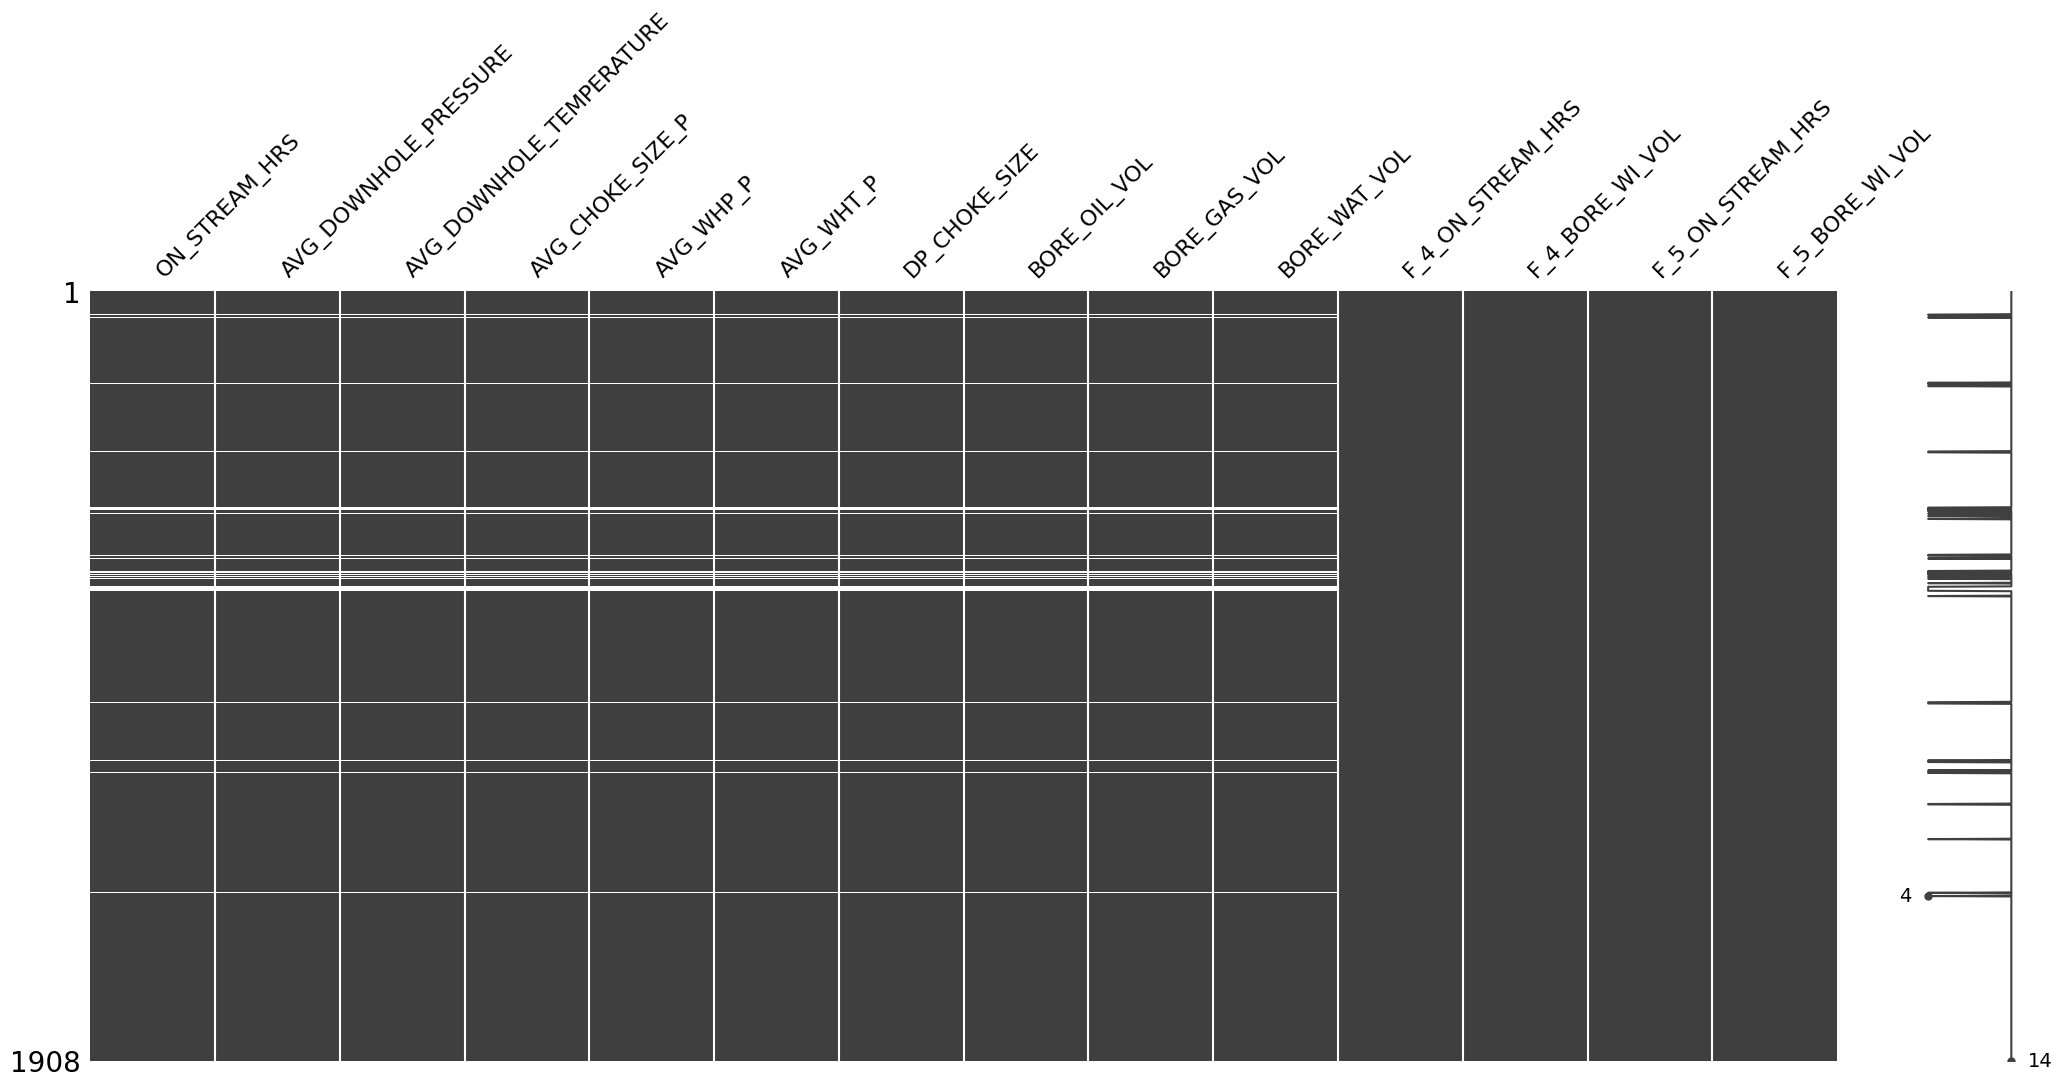

In [1351]:
msno.matrix(train)

In [1352]:
train[train.isnull().any(axis=1)].describe()


,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.000000,64.000000,64.000000,64.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358594,368.638969,0.723177,531.723284
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.928200,1596.277243,3.509475,2340.174060
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.158330,10681.458016,23.833330,16544.539694


In [1353]:
# only 7 and 8 vobservations of injectors data are non-zeroes
train[train.isnull().any(axis=1)].loc[train[train.isnull().any(axis=1)]["F_4_BORE_WI_VOL"] > 0].shape, train[
    train.isnull().any(axis=1)].loc[train[train.isnull().any(axis=1)]["F_5_BORE_WI_VOL"] > 0].shape

((7, 14), (8, 14))

In [1354]:
# total missing values
train.isnull().sum()

ON_STREAM_HRS               64
AVG_DOWNHOLE_PRESSURE       64
AVG_DOWNHOLE_TEMPERATURE    64
AVG_CHOKE_SIZE_P            64
AVG_WHP_P                   64
AVG_WHT_P                   64
DP_CHOKE_SIZE               64
BORE_OIL_VOL                64
BORE_GAS_VOL                64
BORE_WAT_VOL                64
F_4_ON_STREAM_HRS            0
F_4_BORE_WI_VOL              0
F_5_ON_STREAM_HRS            0
F_5_BORE_WI_VOL              0
dtype: int64

In [1355]:
#remove the rows with complete missing values
train.dropna(inplace=True)

In [1356]:
# total missing values
train.isnull().sum().sum()

0

In [1357]:
oil_vol = train.pop("BORE_OIL_VOL")
train.insert(0, "BORE_OIL_VOL", oil_vol)
train

,BORE_OIL_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,
2010-01-01,18593.749401,24.0,3378.643673,223.079164,50.150825,749.568621,190.264943,271.390953,1.462166e+07,15304.241356,24.0,44109.287732,24.0,49054.221066
2010-01-02,18701.242265,24.0,3377.769461,223.095696,50.694654,744.664780,190.708397,266.368677,1.469266e+07,16519.118273,24.0,41936.969541,24.0,51515.296516
2010-01-03,17799.912406,24.0,3408.561097,223.074953,47.665676,774.827418,192.268341,299.398157,1.400904e+07,14796.150455,24.0,41114.572918,24.0,51717.286427
2010-01-04,17002.616014,24.0,3439.266918,223.022721,44.706230,806.160543,191.994925,333.246980,1.341015e+07,13428.619835,24.0,40267.292699,24.0,51948.640243
2010-01-05,17270.939334,24.0,3429.064568,223.035833,45.743761,792.735696,191.503603,318.470614,1.361768e+07,9839.905499,24.0,40524.238503,24.0,52129.744099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,1662.711432,24.0,3847.013385,211.367931,100.000000,446.876829,190.761010,32.394472,1.366424e+06,21779.601368,24.0,27765.068530,24.0,26704.126695
2015-03-20,1707.494884,24.0,3846.666639,211.352287,100.000000,446.242576,190.577844,31.563179,1.397308e+06,23586.538158,24.0,26112.632371,24.0,27951.162219
2015-03-21,1725.420844,24.0,3846.286199,211.349048,100.000000,446.048129,191.111429,31.526865,1.408435e+06,22172.777429,24.0,26281.191015,24.0,27980.731217


In [1369]:
train.tail(20)

,BORE_OIL_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,
2015-03-04,1779.450317,24.0,3821.592527,209.850007,100.000000,454.086963,189.880203,32.651604,1.508350e+06,22104.092697,24.0,29165.851752,24.0,24121.423651
2015-03-05,1699.947111,24.0,3843.297908,211.360497,100.000000,452.163316,188.922736,33.132518,1.444684e+06,21864.513812,24.0,29165.851752,24.0,24121.423651
2015-03-06,1647.678785,24.0,3839.603114,211.369640,100.000000,447.075507,189.000768,32.798671,1.392909e+06,21843.757437,24.0,30297.467150,24.0,23718.875773
2015-03-07,1634.029896,24.0,3840.601859,211.369640,100.000000,446.603554,186.068149,31.935579,1.391081e+06,21857.972408,24.0,30323.098348,24.0,23775.484068
2015-03-08,1625.978938,24.0,3841.200265,211.369640,97.916667,447.643527,189.585110,32.963622,1.382866e+06,21780.922229,24.0,30228.829744,24.0,23806.933121
2015-03-09,1656.987704,24.0,3841.970480,211.369640,100.000000,446.597994,187.989660,31.937053,1.397298e+06,21945.715266,24.0,30270.641011,24.0,23781.773879
2015-03-10,1646.106332,24.0,3842.521182,211.374754,100.000000,447.042816,188.919750,32.599724,1.372458e+06,21852.626069,24.0,30634.619605,24.0,23433.841276
2015-03-11,1643.024325,24.0,3843.235321,211.380556,100.000000,446.006013,188.253308,31.929363,1.366879e+06,21927.160325,24.0,27037.723425,24.0,27054.007679
2015-03-12,1639.439133,24.0,3842.423076,211.376663,100.000000,446.254191,188.788259,32.325757,1.365665e+06,22575.010817,24.0,24098.642413,24.0,21653.454165


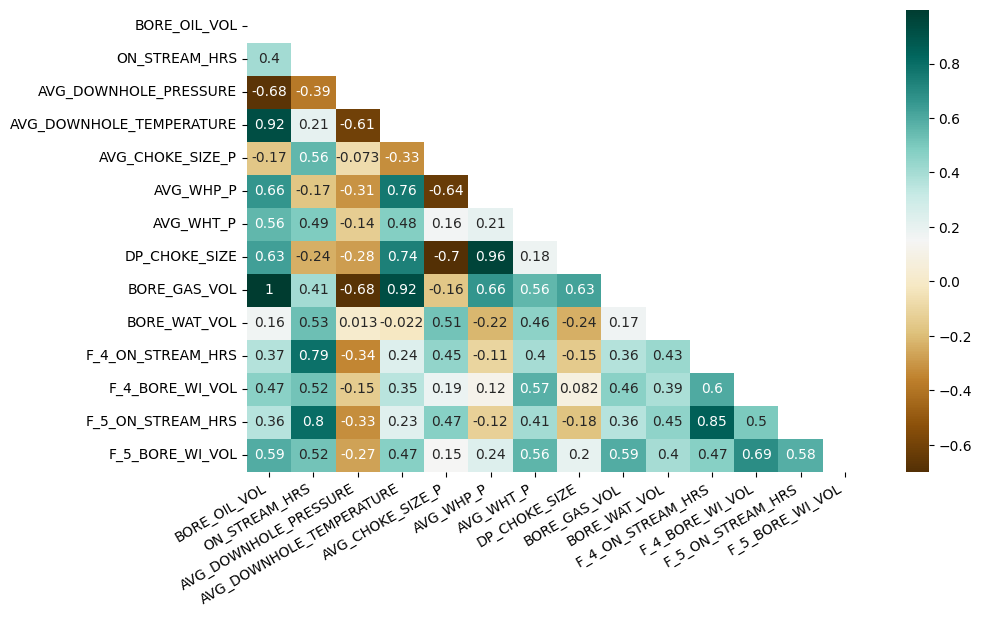

In [1358]:
mask = np.triu(np.ones_like(train.corr()))
plt.figure(figsize=(10,6))
correlation_mat = train.corr(method='spearman')
ax = sns.heatmap(correlation_mat, annot = True, cmap='BrBG', mask=mask)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);
plt.show()

In [1359]:
# Select the best features
def select_features(df, target, correlation_type, threshold):
    features = df.corr(correlation_type).loc[target].drop(target)
    best_features = features.where(abs(features) > threshold).dropna()
    df = pd.concat([df[target], df[best_features.index]], axis=1)
    return df
        

In [1362]:
train_best = select_features(train, "BORE_OIL_VOL", "spearman", 0.2)

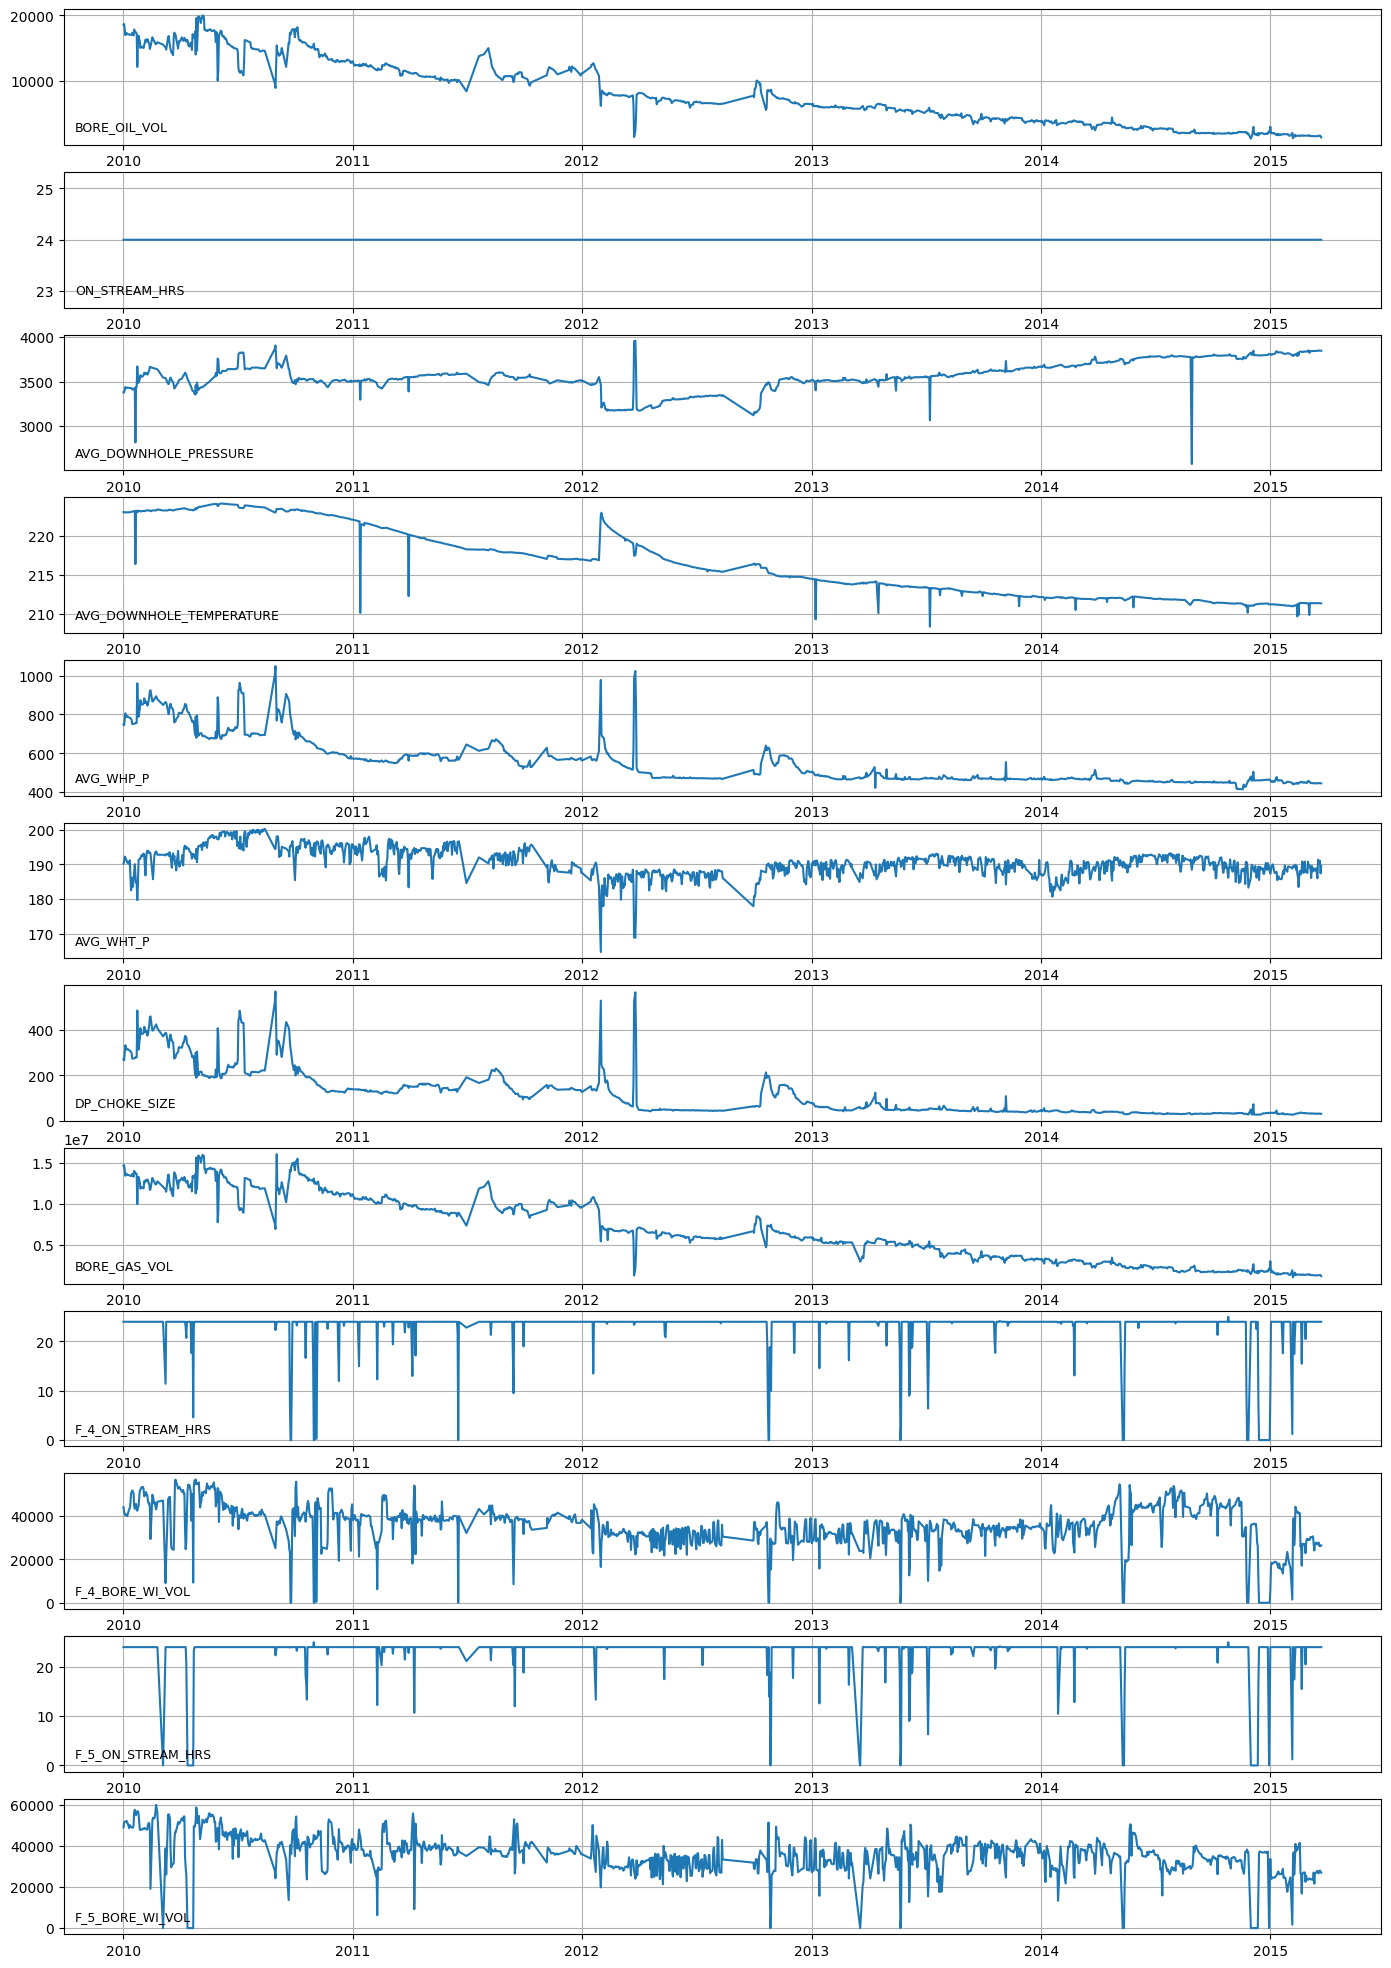

In [1365]:
# Data visulaization and disribution plots for well F-14 after including the injectors
data = train_best.columns

# Creating figure with two rows and one column
fig, axs = plt.subplots(nrows=len(data), figsize=(17, 25))

axs = axs.ravel()

for id, column in enumerate(data):

    axs[id].plot(train_best.loc[train_best["ON_STREAM_HRS"] ==24 ][column])
    axs[id].grid(True)
    axs[id].legend([column], loc='lower left', fontsize=9, handlelength=0, handletextpad=0, frameon=False)
    
plt.show()

In [1367]:
train_best.to_csv("model.csv")

# strategies to improve  model performance
* optimizing the lstm architecture
* reducing the number of features
* removing the shut-ins days and treating sudden movements
* interpolating the shut-ins 